## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [4]:
df = pd.read_csv("processed_dataset.csv")

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Encoding Categorical Columns

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_worked_at_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
categorical_columns = ['Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident_1,left_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,False,True,False,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,False,True,False,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,False,True,False,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,False,True,False,False,False,False,False,False,False,True,False,False,True,False


## Performing a Stratified Split of Dataset

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('left_1', axis=1)
y = df['left_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

## Upsampling the Training Dataset using the SMOTE Technique

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Original Dataset Counter : ", Counter(y_train))
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Random Oversampling Counter : ", Counter(y_train_smote))

Original Dataset Counter :  Counter({False: 9142, True: 2857})
Random Oversampling Counter :  Counter({False: 9142, True: 9142})


## Building a Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.01,0.1,1,10], 'solver' : ['lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid, cv = 5, verbose = 2)
grid.fit(X_train_smote, y_train_smote)
print("Best parameters : ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.9s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.8s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.6s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   0.8s
[CV] END ...............................C=0.01, solver=lbfgs; total time=   1.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.1s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   1.8s
[CV] END ................................C=0.1, s

In [25]:
tuned_model = LogisticRegression(C = 0.01, solver = 'lbfgs', max_iter = 1000)
tuned_model.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.01, max_iter=1000)

In [27]:
y_pred = tuned_model.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.7733333333333333

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.92      0.77      0.84      2286
        True       0.52      0.78      0.62       714

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.79      3000



### Building a Random Forest Classifier Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
param_grid_rf  = {'n_estimators' : [5,8,10], 'max_depth' : [2,3], 'min_samples_split' : [400,500,600], 'min_samples_leaf' : [300,400,500], 'max_features' : [1,2] }
grid_search_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, cv = 5, verbose = 2)
grid_search_rf.fit(X_train_smote,y_train_smote)
print("Best parameters : ", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=5; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=8; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=8; total time=   0.0s
[CV] END max_depth=2, max_features=1, min_samples_leaf=300, min_samples_split=400, n_estimators=8; total time= 

In [66]:
tuned_rf_model = RandomForestClassifier(n_estimators = 10, max_depth = 3, min_samples_leaf = 400, min_samples_split = 500, max_features = 2)
tuned_rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=3, max_features=2, min_samples_leaf=400,
                       min_samples_split=500, n_estimators=10)

In [68]:
y_pred_rf = tuned_rf_model.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred_rf)

0.849

In [72]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.89      0.92      0.90      2286
        True       0.70      0.63      0.66       714

    accuracy                           0.85      3000
   macro avg       0.80      0.77      0.78      3000
weighted avg       0.84      0.85      0.85      3000



### Building a Gradient Boosting Classifier Model

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(), random_state=42)

In [95]:
param_grid_ada = {'n_estimators': [5,8,10],'learning_rate': [0.1,0.5, 1]}
grid_search_ada = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=1,
    verbose=2
)
grid_search_ada.fit(X_train_smote, y_train_smote)
print("Best parameters : ", grid_search_ada.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................learning_rate=0.1, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.1, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.1, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.1, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.1, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.1, n_estimators=8; total time=   0.1s
[CV] END ..................learning_rate=0.1, n_estimators=8; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.1, n_estimators=8; total time=   0.1s
[CV] END ..................learning_rate=0.1, n_estimators=8; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.1, n_estimators=8; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.5, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.5, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.5, n_estimators=5; total time=   0.1s
[CV] END ..................learning_rate=0.5, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.5, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.5, n_estimators=8; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.5, n_estimators=8; total time=   0.0s
[CV] END ..................learning_rate=0.5, n_estimators=8; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=0.5, n_estimators=8; total time=   0.0s
[CV] END ..................learning_rate=0.5, n_estimators=8; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ....................learning_rate=1, n_estimators=5; total time=   0.1s
[CV] END ....................learning_rate=1, n_estimators=5; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ....................learning_rate=1, n_estimators=5; total time=   0.0s
[CV] END ....................learning_rate=1, n_estimators=5; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ....................learning_rate=1, n_estimators=8; total time=   0.1s
[CV] END ....................learning_rate=1, n_estimators=8; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ....................learning_rate=1, n_estimators=8; total time=   0.1s
[CV] END ....................learning_rate=1, n_estimators=8; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ....................learning_rate=1, n_estimators=8; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.1s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.0s


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.1s
[CV] END ...................learning_rate=1, n_estimators=10; total time=   0.0s
Best parameters :  {'learning_rate': 0.1, 'n_estimators': 5}


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [96]:
tuned_model_ada = AdaBoostClassifier(estimator = DecisionTreeClassifier(), random_state = 42, learning_rate = 0.1, n_estimators = 5)
tuned_model_ada.fit(X_train_smote,y_train_smote)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=5, random_state=42)

In [99]:
y_pred_ada = tuned_model_ada.predict(X_test)

In [101]:
print(accuracy_score(y_test,y_pred_ada))

0.973


In [103]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      2286
        True       0.92      0.97      0.94       714

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## Evaluation of Models

### ROC/AUC Curves for the Models

In [107]:
from sklearn.metrics import roc_curve, auc

#### Linear Regression

In [110]:
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_linear,tpr_linear)

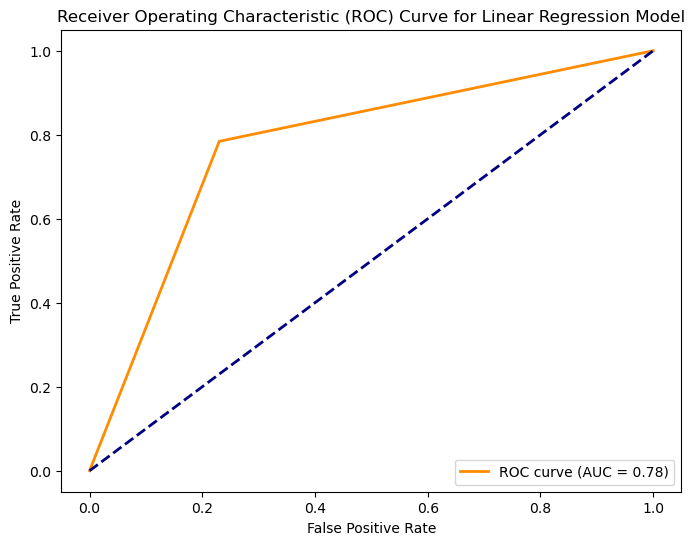

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear Regression Model')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

##### Best Model

In [116]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

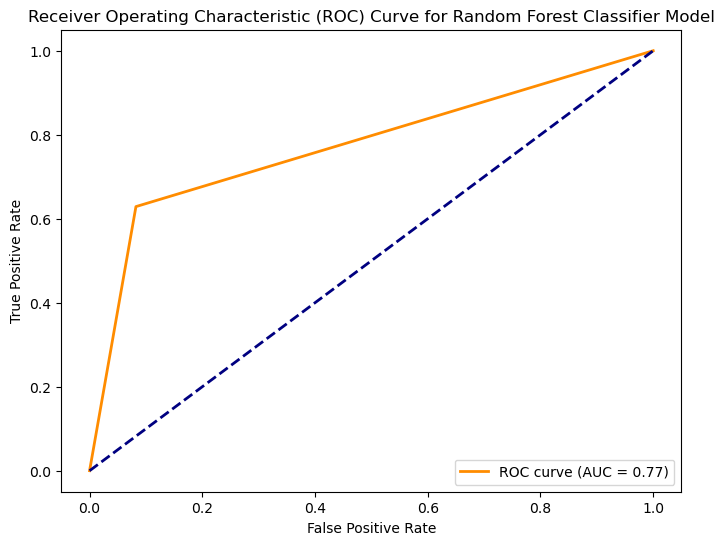

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier Model')
plt.legend(loc="lower right")
plt.show()

#### AdaBoosted Model

In [121]:
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_ada)
roc_auc_ada = auc(fpr_ada,tpr_ada)

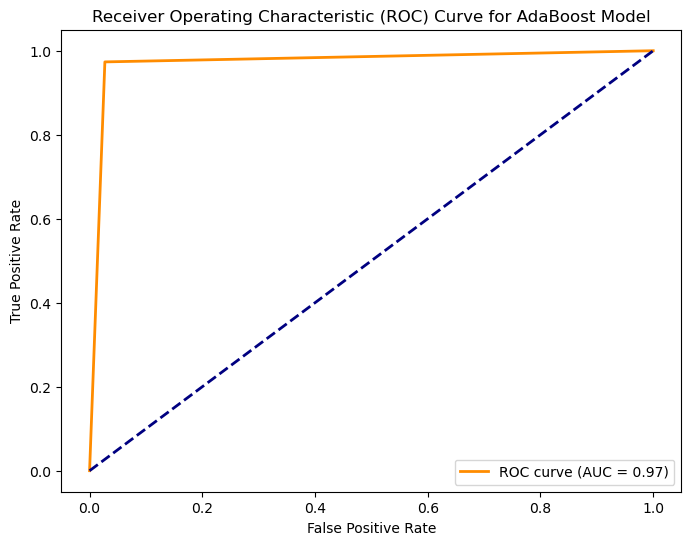

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost Model')
plt.legend(loc="lower right")
plt.show()

Based on the ROC AUC curve, AdaBoost model would be the best choice since it has the highest AUC.

### Confusion Matrix for the Models

In [127]:
print("Confusion matrix for the Linear Regression Model : \n",confusion_matrix(y_test,y_pred))

Confusion matrix for the Linear Regression Model : 
 [[1760  526]
 [ 154  560]]


In [131]:
print("Confusion matrix for the Random Forest Classifier Model : \n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix for the Random Forest Classifier Model : 
 [[2098  188]
 [ 265  449]]


In [133]:
print("Confusion matrix for the AdaBoost Model : \n",confusion_matrix(y_test,y_pred_ada))

Confusion matrix for the AdaBoost Model : 
 [[2224   62]
 [  19  695]]


While predicting emplyee turnover, recall would be more important bacause : 
- Recall measures how many employees who are actually going to leave (true positives) are correctly identified by the model.
- In the context of employee turnover, missing an employee who is likely to leave (false negative) can have significant consequences :
  - The company misses the opportunity to intervene (e.g., offering incentives, improving working conditions).
  - It could result in increased costs for recruiting and training replacements.

Based on the confusion matrix, AdaBoost model is better because it has higher recall compared to Random Forest Classifier

## Emplyee Retention Stratergies

In [138]:
def categorize_risk(prob):
    if prob < 0.20:
        return 'Safe'
    elif 0.20 <= prob < 0.60:
        return 'Low-Risk'
    elif 0.60 <= prob < 0.90:
        return 'Medium-Risk'
    else:
        return 'High-Risk'

In [142]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(estimator=tuned_rf_model, cv='prefit')
calibrated_model.fit(X_train_smote, y_train_smote)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(max_depth=3,
                                                        max_features=2,
                                                        min_samples_leaf=400,
                                                        min_samples_split=500,
                                                        n_estimators=10))

In [144]:
test_df = X_test.copy()
test_df['Turnover_Probability'] = calibrated_model.predict_proba(X_test)[:,1]

In [146]:
test_df.head(100)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Turnover_Probability
6910,0.88,1.00,3,125,3,False,False,False,False,False,False,False,False,False,False,True,False,True,0.480831
2860,0.99,0.68,4,190,3,False,False,False,False,False,False,False,False,False,False,True,True,False,0.535700
6286,0.40,0.67,3,115,3,False,False,False,True,False,False,False,False,False,False,False,False,True,0.326501
12838,0.98,0.77,3,191,2,False,False,False,False,False,False,False,False,True,False,False,False,True,0.078231
13692,0.83,0.73,4,157,2,False,False,True,False,False,False,False,False,False,False,False,False,True,0.049039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.10,0.97,7,254,4,False,False,False,False,False,False,False,False,True,False,False,True,False,0.653135
6642,0.51,0.76,2,239,3,False,False,False,False,False,False,False,False,False,True,False,False,False,0.829586
418,0.42,0.53,3,199,4,False,False,False,False,False,False,False,False,False,False,True,False,True,0.626473
7622,0.59,0.65,4,177,2,False,False,False,False,False,False,False,True,False,False,False,True,False,0.113249


In [148]:
test_df['Risk_Category'] = test_df['Turnover_Probability'].apply(categorize_risk)

In [150]:
test_df.head(20)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_worked_at_company,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Turnover_Probability,Risk_Category
6910,0.88,1.00,3,125,3,False,False,False,False,False,False,False,False,False,False,True,False,True,0.480831,Low-Risk
2860,0.99,0.68,4,190,3,False,False,False,False,False,False,False,False,False,False,True,True,False,0.535700,Low-Risk
6286,0.40,0.67,3,115,3,False,False,False,True,False,False,False,False,False,False,False,False,True,0.326501,Low-Risk
12838,0.98,0.77,3,191,2,False,False,False,False,False,False,False,False,True,False,False,False,True,0.078231,Safe
13692,0.83,0.73,4,157,2,False,False,True,False,False,False,False,False,False,False,False,False,True,0.049039,Safe
6133,0.59,0.58,2,267,3,False,False,False,False,False,False,False,False,True,False,False,False,True,0.719523,Medium-Risk
3585,0.85,0.62,2,280,4,False,False,True,False,False,False,False,False,False,False,False,True,False,0.829586,Medium-Risk
330,0.38,0.57,2,140,3,False,False,False,False,False,False,False,False,True,False,False,True,False,0.909226,High-Risk
8359,0.59,0.57,3,147,4,False,False,False,False,False,False,False,False,False,False,True,True,False,0.535700,Low-Risk
4768,0.93,0.96,3,268,4,False,False,False,False,False,False,False,False,False,False,True,True,False,0.535700,Low-Risk


C:\Users\adity\AppData\Local\Temp\ipykernel_21448\1929575027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=['green','yellow','orange','red'])


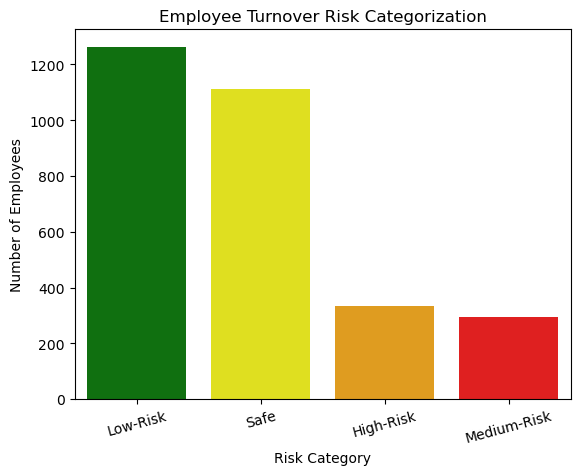

In [152]:
category_counts = test_df['Risk_Category'].value_counts()

# Plot the distribution
sns.barplot(x=category_counts.index, y=category_counts.values, palette=['green','yellow','red','ora'])
plt.title('Employee Turnover Risk Categorization')
plt.xlabel('Risk Category')
plt.ylabel('Number of Employees')
plt.xticks(rotation=15)
plt.show()